Importance = resulting coverage from placing a single sensor in that output area

In [1]:
import matplotlib.pyplot as plt

from spineq.data.fetcher import get_oa_shapes, lad20nm_to_lad20cd
from spineq.opt.optimise import calc_oa_weights
from spineq.plot.plotting import plot_oa_importance

In [2]:
theta = 500
vmax = None

In [3]:
lad20nm = "Camden"
lad20cd = lad20nm_to_lad20cd(lad20nm)

<AxesSubplot:>

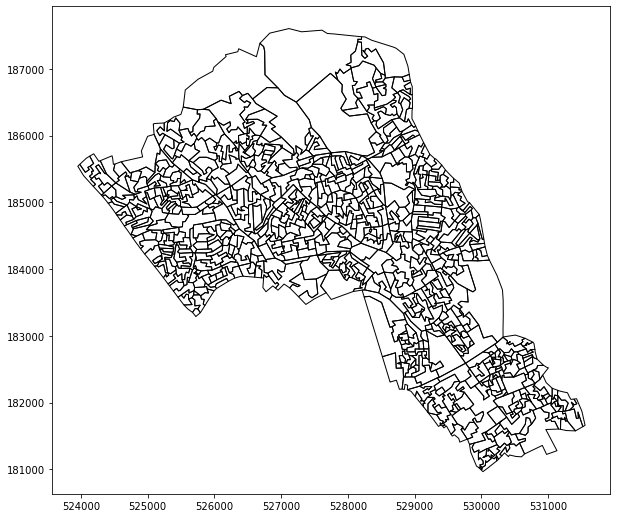

In [4]:
ax = plt.figure(figsize=(10, 10)).gca()
get_oa_shapes(lad20cd).plot(facecolor="None", edgecolor="k", ax=ax)

## Total Population

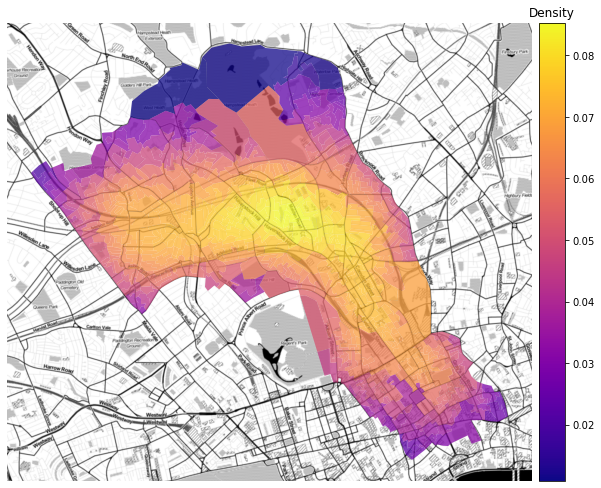

In [5]:
oa_weights = calc_oa_weights(
    lad20cd=lad20cd,
    pop_age_groups={"pop_total": {"min": 0, "max": 90, "weight": 1}},
    population_weight=1,
    workplace_weight=0,
)
plot_oa_importance(lad20cd, oa_weights, figsize=(10, 10), theta=theta, vmax=vmax)

## Children < 12

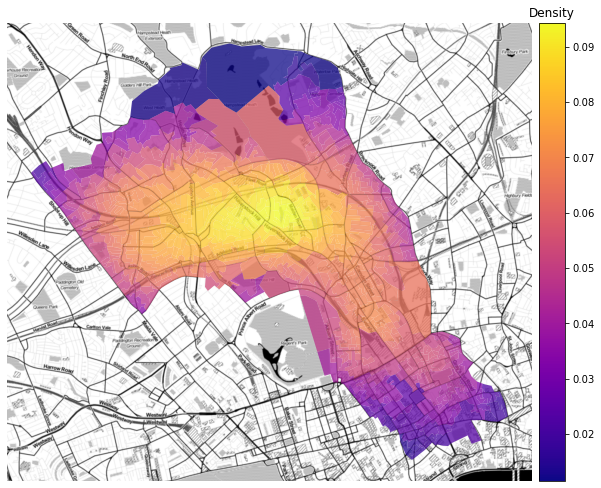

In [6]:
oa_weights = calc_oa_weights(
    lad20cd=lad20cd,
    pop_age_groups={"pop_children": {"min": 0, "max": 11, "weight": 1}},
    population_weight=1,
    workplace_weight=0,
)
plot_oa_importance(lad20cd, oa_weights, figsize=(10, 10), theta=theta, vmax=vmax)

## Adults >70

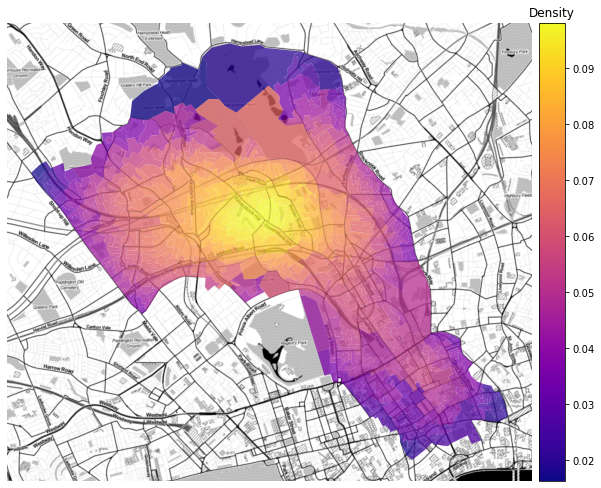

In [7]:
oa_weights = calc_oa_weights(
    lad20cd=lad20cd,
    pop_age_groups={"pop_elderly": {"min": 70, "max": 90, "weight": 1}},
    population_weight=1,
    workplace_weight=0,
)

plot_oa_importance(lad20cd, oa_weights, figsize=(10, 10), theta=theta, vmax=vmax)

## Workers

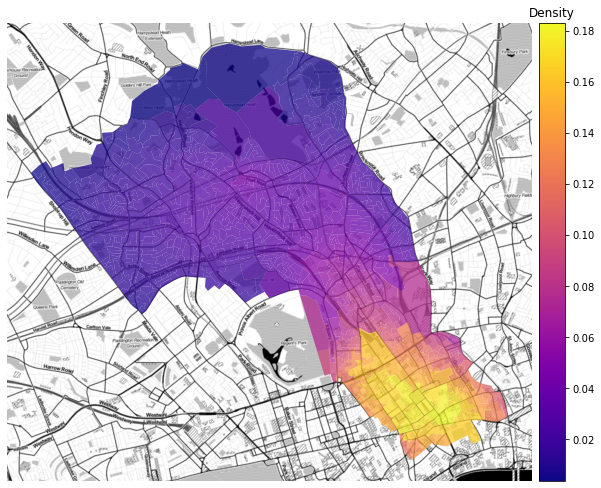

In [8]:
oa_weights = calc_oa_weights(lad20cd=lad20cd, population_weight=0, workplace_weight=1)

plot_oa_importance(lad20cd, oa_weights, figsize=(10, 10), theta=theta, vmax=vmax)